In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
payroll = pd.read_csv("../data/bookstore_payroll.csv")
payroll.head()

,pay_period_start,employee_id,employee_name,location,role,employment_type,hourly_rate,hours_biweekly,gross_pay,cpp_withheld,ei_withheld,income_tax_withheld,employee_benefits,net_pay,dataset
0,2019-11-11,1001,Harper Brown,YYC-DT,Store Manager,PERM,27.49,80.27,2206.62,114.74,35.31,264.79,44.13,1747.65,bookstore_payroll
1,2019-11-25,1001,Harper Brown,YYC-DT,Store Manager,PERM,27.49,76.56,2104.63,109.44,33.67,252.56,42.09,1666.87,bookstore_payroll
2,2019-12-09,1001,Harper Brown,YYC-DT,Store Manager,PERM,27.49,78.97,2170.89,112.89,34.73,260.51,43.42,1719.34,bookstore_payroll
3,2019-12-23,1001,Harper Brown,YYC-DT,Store Manager,PERM,27.49,72.70,1998.52,103.92,31.98,239.82,39.97,1582.83,bookstore_payroll
4,2020-01-06,1001,Harper Brown,YYC-DT,Store Manager,PERM,27.49,50.45,1386.87,72.12,22.19,166.42,27.74,1098.40,bookstore_payroll


In [108]:
payroll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6640 entries, 0 to 6639
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   pay_period_start     6640 non-null   object 
 1   employee_id          6640 non-null   int64  
 2   employee_name        6640 non-null   object 
 3   location             6640 non-null   object 
 4   role                 6640 non-null   object 
 5   employment_type      6640 non-null   object 
 6   hourly_rate          6640 non-null   float64
 7   hours_biweekly       6640 non-null   float64
 8   gross_pay            6640 non-null   float64
 9   cpp_withheld         6640 non-null   float64
 10  ei_withheld          6640 non-null   float64
 11  income_tax_withheld  6640 non-null   float64
 12  employee_benefits    6640 non-null   float64
 13  net_pay              6640 non-null   float64
 14  dataset              6640 non-null   object 
dtypes: float64(8), int64(1), object(6)
mem

In [109]:
payroll.corr(numeric_only=True)

,employee_id,hourly_rate,hours_biweekly,gross_pay,cpp_withheld,ei_withheld,income_tax_withheld,employee_benefits,net_pay
employee_id,1.000000,-0.213856,-0.187859,-0.218569,-0.218570,-0.218569,-0.218568,-0.258248,-0.216449
hourly_rate,-0.213856,1.000000,0.625002,0.881855,0.881855,0.881852,0.881855,0.837100,0.881813
hours_biweekly,-0.187859,0.625002,1.000000,0.913187,0.913187,0.913189,0.913187,0.884558,0.912407
gross_pay,-0.218569,0.881855,0.913187,1.000000,1.000000,1.000000,1.000000,0.950109,0.999916
cpp_withheld,-0.218570,0.881855,0.913187,1.000000,1.000000,1.000000,1.000000,0.950109,0.999916
ei_withheld,-0.218569,0.881852,0.913189,1.000000,1.000000,1.000000,1.000000,0.950107,0.999916
income_tax_withheld,-0.218568,0.881855,0.913187,1.000000,1.000000,1.000000,1.000000,0.950109,0.999916
employee_benefits,-0.258248,0.837100,0.884558,0.950109,0.950109,0.950107,0.950109,1.000000,0.945987
net_pay,-0.216449,0.881813,0.912407,0.999916,0.999916,0.999916,0.999916,0.945987,1.000000


In [110]:
payroll["date"] = pd.to_datetime(payroll["pay_period_start"])

In [111]:
payroll["labor_cost"] = (
    payroll["gross_pay"]
    + payroll["cpp_withheld"]
    + payroll["ei_withheld"]
    + payroll["employee_benefits"]
)

In [112]:
payroll[["gross_pay", "labor_cost"]].head()

,gross_pay,labor_cost
0,2206.62,2400.80
1,2104.63,2289.83
2,2170.89,2361.93
3,1998.52,2174.39
4,1386.87,1508.92


In [113]:
payroll_monthly = (
    payroll
    .groupby(pd.Grouper(key="date", freq="ME"))
    .agg(
        labor_cost=("labor_cost", "sum"),
        employees=("employee_id", "nunique")
    )
    .reset_index()
)

In [114]:
payroll_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        72 non-null     datetime64[ns]
 1   labor_cost  72 non-null     float64       
 2   employees   72 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.8 KB


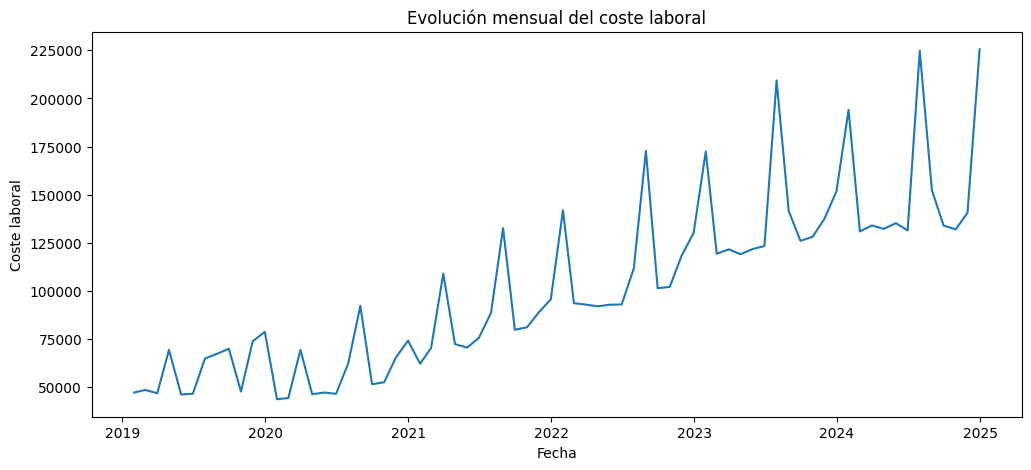

In [115]:
plt.figure(figsize=(12,5))
plt.plot(payroll_monthly["date"], payroll_monthly["labor_cost"])
plt.title("Evolución mensual del coste laboral")
plt.xlabel("Fecha")
plt.ylabel("Coste laboral")
plt.show()

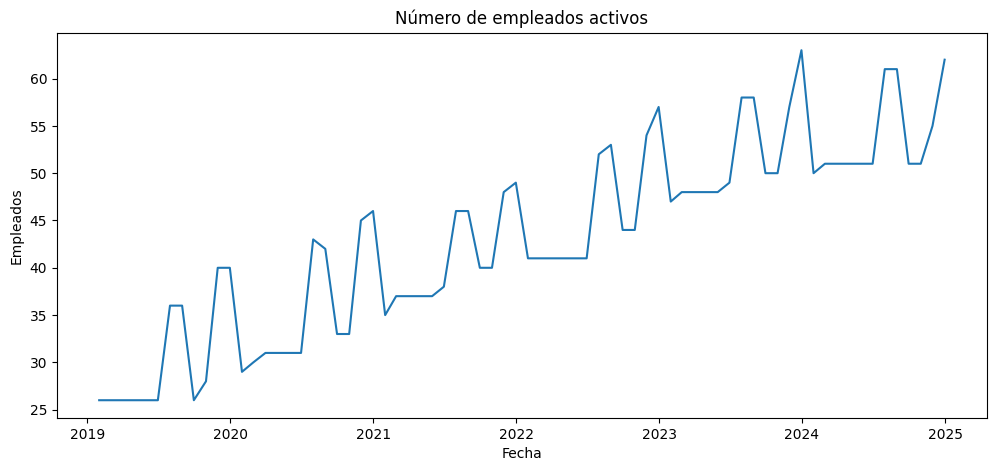

In [116]:
plt.figure(figsize=(12,5))
plt.plot(payroll_monthly["date"], payroll_monthly["employees"])
plt.title("Número de empleados activos")
plt.xlabel("Fecha")
plt.ylabel("Empleados")
plt.show()

El crecimiento de la empresa ha estado acompañado de una expansión de la plantilla que no ha sido compensada proporcionalmente por el aumento de ingresos, lo que ha generado presión sobre la liquidez y el balance de crédito.

In [117]:
payroll["pay_period_start"] = pd.to_datetime(payroll["pay_period_start"])

payroll["year"] = payroll["pay_period_start"].dt.year
payroll["month"] = payroll["pay_period_start"].dt.month


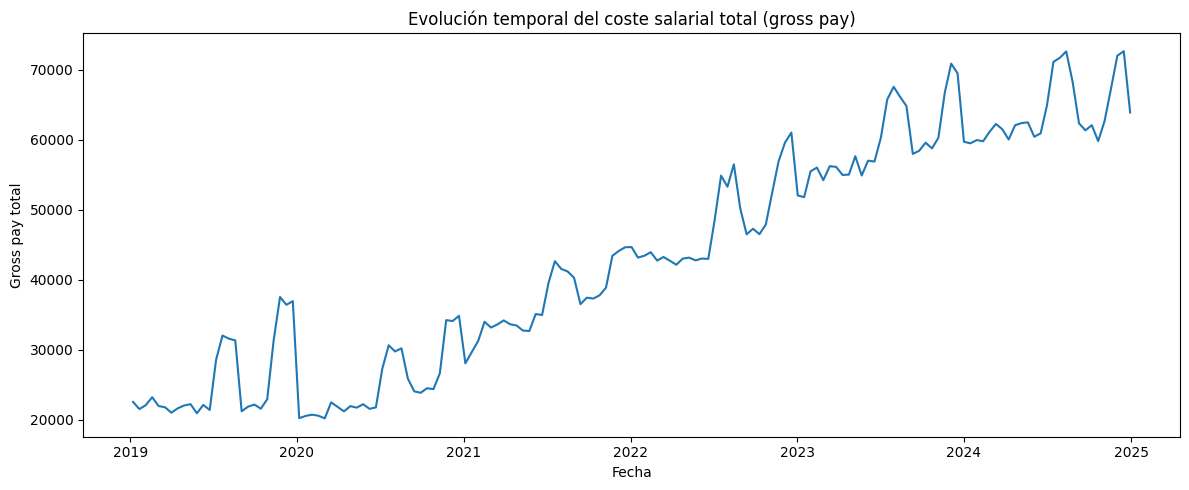

In [118]:
payroll_time = (
    payroll.groupby("pay_period_start", as_index=False)["gross_pay"]
    .sum()
    .sort_values("pay_period_start")
)

plt.figure(figsize=(12,5))
plt.plot(payroll_time["pay_period_start"], payroll_time["gross_pay"])
plt.title("Evolución temporal del coste salarial total (gross pay)")
plt.xlabel("Fecha")
plt.ylabel("Gross pay total")
plt.tight_layout()
plt.show()

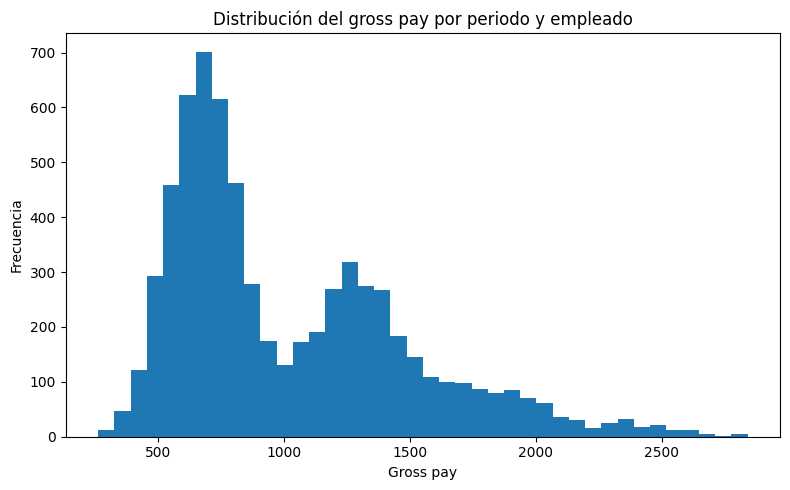

In [119]:
plt.figure(figsize=(8,5))
plt.hist(payroll["gross_pay"], bins=40)
plt.title("Distribución del gross pay por periodo y empleado")
plt.xlabel("Gross pay")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

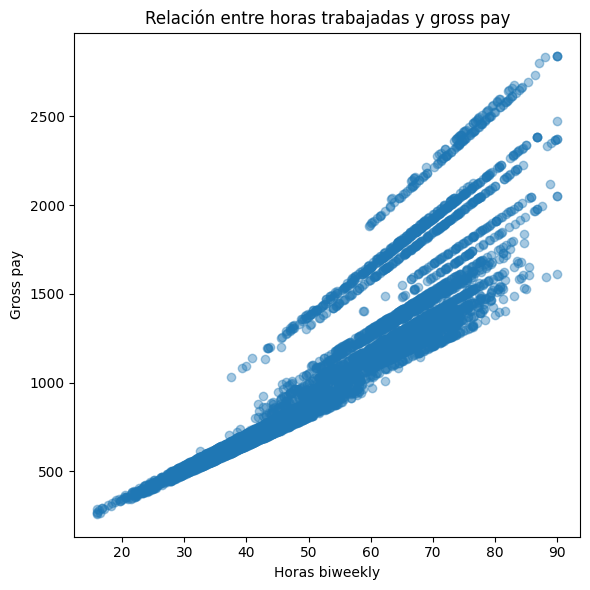

In [120]:
plt.figure(figsize=(6,6))
plt.scatter(payroll["hours_biweekly"], payroll["gross_pay"], alpha=0.4)
plt.title("Relación entre horas trabajadas y gross pay")
plt.xlabel("Horas biweekly")
plt.ylabel("Gross pay")
plt.tight_layout()
plt.show()

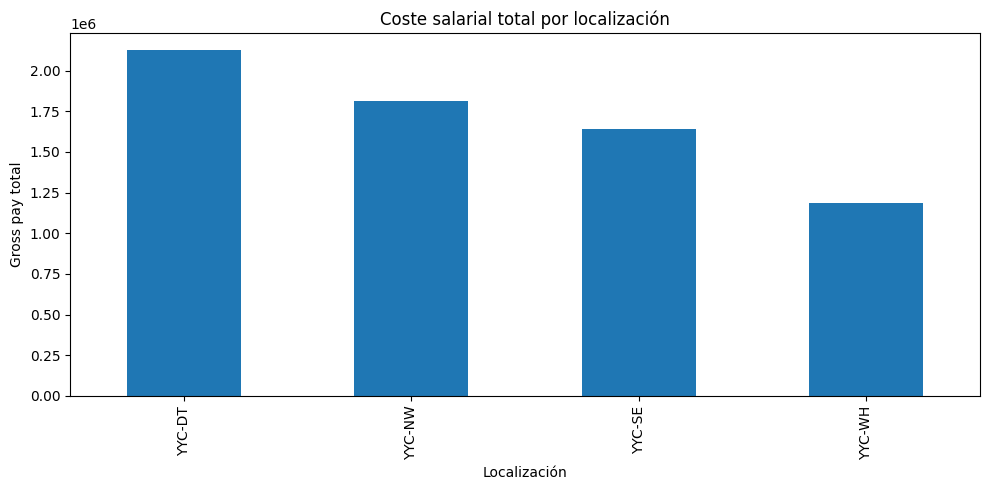

In [121]:
payroll_location = (
    payroll.groupby("location")["gross_pay"]
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,5))
payroll_location.plot(kind="bar")
plt.title("Coste salarial total por localización")
plt.xlabel("Localización")
plt.ylabel("Gross pay total")
plt.tight_layout()
plt.show()

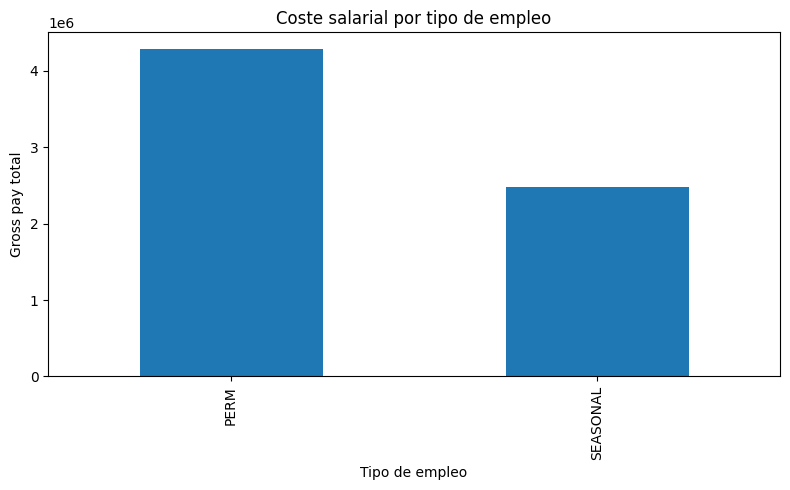

In [122]:
payroll_type = (
    payroll.groupby("employment_type")["gross_pay"]
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(8,5))
payroll_type.plot(kind="bar")
plt.title("Coste salarial por tipo de empleo")
plt.xlabel("Tipo de empleo")
plt.ylabel("Gross pay total")
plt.tight_layout()
plt.show()


In [123]:
payroll_monthly = (
    payroll.groupby(["year", "month"], as_index=False)["gross_pay"]
    .sum()
)

payroll_monthly["date"] = (
    pd.to_datetime(
        payroll_monthly["year"].astype(str) + "-" +
        payroll_monthly["month"].astype(str) + "-01"
    )
    + pd.offsets.MonthEnd(0)
)

In [124]:
payroll_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   year       72 non-null     int32         
 1   month      72 non-null     int32         
 2   gross_pay  72 non-null     float64       
 3   date       72 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int32(2)
memory usage: 1.8 KB


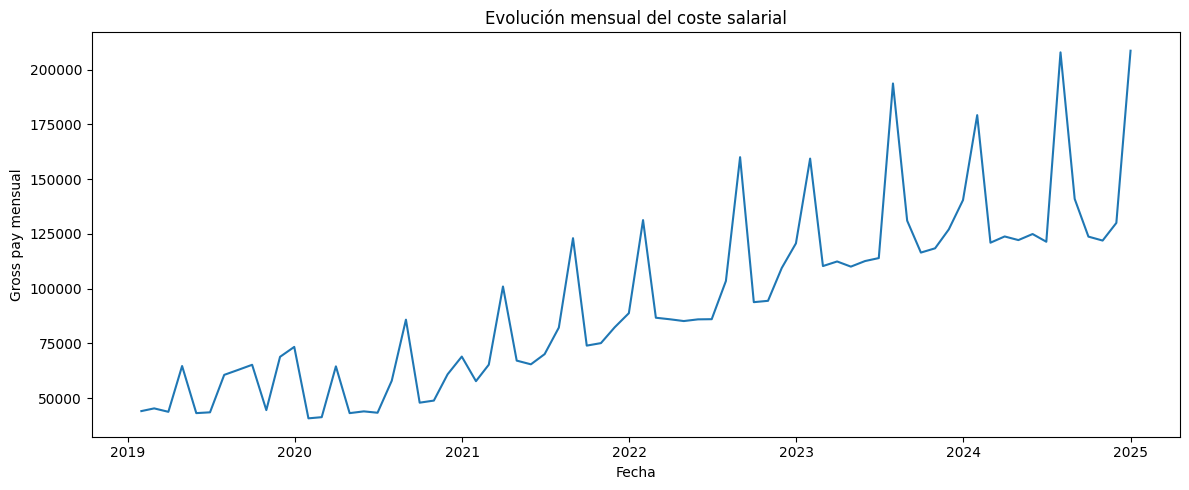

In [125]:
plt.figure(figsize=(12,5))
plt.plot(payroll_monthly["date"], payroll_monthly["gross_pay"])
plt.title("Evolución mensual del coste salarial")
plt.xlabel("Fecha")
plt.ylabel("Gross pay mensual")
plt.tight_layout()
plt.show()

Correlacion con Ventas

In [126]:
sales = pd.read_csv("archive/bookstore_chain_AB_calgary_2019_2024_dataset/bookstore_sales.csv")

In [127]:
sales["date"] = pd.to_datetime(sales["date"])

In [128]:
sales_monthly = (
    sales
    .groupby(pd.Grouper(key="date", freq="ME"))
    .agg(net_revenue=("net_revenue", "sum"))
    .reset_index()
)

In [129]:
sales_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         72 non-null     datetime64[ns]
 1   net_revenue  72 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.3 KB


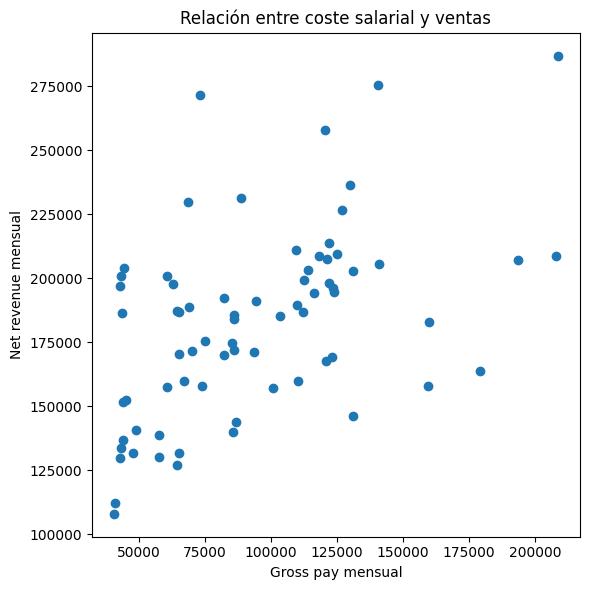

In [130]:
merged = payroll_monthly.merge(
    sales_monthly,
    on="date",
    how="inner"
)

plt.figure(figsize=(6,6))
plt.scatter(merged["gross_pay"], merged["net_revenue"])
plt.title("Relación entre coste salarial y ventas")
plt.xlabel("Gross pay mensual")
plt.ylabel("Net revenue mensual")
plt.tight_layout()
plt.show()

In [131]:
merged[["gross_pay", "net_revenue"]].corr()

,gross_pay,net_revenue
gross_pay,1.000000,0.502952
net_revenue,0.502952,1.000000


In [132]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   year         72 non-null     int32         
 1   month        72 non-null     int32         
 2   gross_pay    72 non-null     float64       
 3   date         72 non-null     datetime64[ns]
 4   net_revenue  72 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int32(2)
memory usage: 2.4 KB
